<a href="https://colab.research.google.com/github/krispad/Hello_Kris/blob/master/graphene_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving sensor_data_2024-05-02_r2d2.xlsx to sensor_data_2024-05-02_r2d2.xlsx


In [3]:
import pandas as pd
gra_rawsd_052024 = pd.read_excel('/content/sensor_data_2024-05-02_r2d2.xlsx', index_col = 'row', skiprows= [0, 1], usecols = ['row','DateTime' ,'rs1', 'rs3', 'rs5', 'rs8',
 'rs11','rs14', 'rs16', 's1', 's3', 's5', 's8', 's11', 's14', 's16'] )

In [4]:
gra_rawsd_052024.head()


,DateTime,rs1,rs3,rs5,rs8,rs11,rs14,rs16,s1,s3,s5,s8,s11,s14,s16
row,,,,,,,,,,,,,,,
0,2024-05-02 10:30:00,253,213,237,420,314,405,536,0.455976,0.451152,0.451120,0.471747,0.472471,0.472566,0.461351
1,2024-05-02 10:30:00,303,217,241,424,317,408,538,0.426367,0.448924,0.448824,0.468618,0.470472,0.470272,0.459456
2,2024-05-02 10:30:00,303,219,241,424,317,408,539,0.426367,0.447810,0.448824,0.468618,0.470472,0.470272,0.458509
3,2024-05-02 10:30:00,303,219,242,425,318,408,539,0.426367,0.447810,0.448250,0.467835,0.469805,0.470272,0.458509
4,2024-05-02 10:30:00,302,219,242,425,318,410,539,0.426960,0.447810,0.448250,0.467835,0.469805,0.468742,0.458509


In [5]:
gra_mean = gra_rawsd_052024.groupby(by = 'DateTime').mean()

In [6]:
gra_mean.shape

(262, 14)

In [7]:
gra_mean.head() # sample means by DateTime over the columns ( raw and reflectance)


,rs1,rs3,rs5,rs8,rs11,rs14,rs16,s1,s3,s5,s8,s11,s14,s16
DateTime,,,,,,,,,,,,,,
2024-05-02 10:30:00,304.761905,219.880952,242.714286,424.047619,317.928571,409.166667,538.309524,0.425324,0.447319,0.447840,0.468580,0.469853,0.469380,0.459163
2024-05-02 10:31:00,303.515152,220.757576,243.939394,423.787879,318.151515,408.848485,537.515152,0.426062,0.446831,0.447137,0.468784,0.469704,0.469623,0.459916
2024-05-02 10:32:00,305.441176,220.911765,244.470588,423.617647,318.176471,408.676471,536.764706,0.424922,0.446745,0.446832,0.468917,0.469688,0.469754,0.460626
2024-05-02 10:33:00,330.562500,220.437500,243.312500,422.812500,317.687500,407.750000,536.031250,0.410045,0.447009,0.447497,0.469547,0.470014,0.470463,0.461321
2024-05-02 10:34:00,329.941176,220.058824,243.235294,422.764706,317.411765,408.029412,535.852941,0.410413,0.447220,0.447541,0.469584,0.470197,0.470249,0.461490


In [8]:
gra_cov = gra_rawsd_052024.loc[:, ['DateTime', 's1', 's3', 's5', 's8', 's11', 's14', 's16']].groupby(by = 'DateTime').cov() # Downweb grouped by 'Datetime'


In [9]:
gra_cov.head(8) # pairwise covariances over the reflectances grouped by DateTime

s1            s3            s5            s8  \
DateTime                                                                      
2024-05-02 10:30:00 s1   0.000071  5.050484e-06  2.446636e-06  2.626866e-06   
                    s3   0.000005  2.272992e-06  1.337729e-06  7.783635e-07   
                    s5   0.000002  1.337729e-06  1.932854e-06  8.385793e-07   
                    s8   0.000003  7.783635e-07  8.385793e-07  1.133101e-06   
                    s11  0.000003  1.173630e-06  1.036802e-06  6.757430e-07   
                    s14  0.000004  9.851183e-07  8.028245e-07  5.787717e-07   
                    s16  0.000001  6.119062e-07  3.940518e-07  6.576342e-07   
2024-05-02 10:31:00 s1   0.000097  2.103910e-06  3.600887e-06  4.409931e-06   

                                  s11           s14           s16  
DateTime                                                           
2024-05-02 10:30:00 s1   2.928721e-06  3.508431e-06  1.287472e-06  
                    s3   1.173630e-06  9.851183e-07  6.119062e-07  
                    s5   1.036802e-06  8.028245e-07  3.940518e-07  
                    s8   6.757430e-07  5.787717e-07  6.576342e-07  
                    s11  1.048298e-06  6.152106e-07  6.609883e-07  
                    s14  6.152106e-07  1.281153e-06  8.804652e-07  
                    s16  6.609883e-07  8.804652e-07  1.422248e-06  
2024-05-02 10:31:00 s1   5.455935e-08 -1.024847e-06  7.405471e-07

In [10]:
gra_cov.loc[gra_cov.index[1], :][4:].sum()



2.770653921930561e-06

In [11]:
gra_cov.columns

Index(['s1', 's3', 's5', 's8', 's11', 's14', 's16'], dtype='object')

In [12]:
def var_cov(dat):
    ''' dat ---- data indexed by a column ( eg. Date) and for each index there is a symmetric matrix consisting of k columns ... see the examlple
               of 'gra_cov' above
      One can also argue that the sensor readings are independent of each other and so the covariances between the readings are zero. We calc. the covariances
      nevertheless and observe that they are close to zero.
    '''
    covar = []

    for i in range(0,len(dat.index),  7):
        a = []
        for k in range(len(dat.columns)):

            #covar.append(i)
            a.append(dat.loc[dat.index[i], :][k] + 2*(dat.loc[dat.index[i],:][k+1:].sum()))
            #covar.append(dat[(date_index[i], refl_cols[k])]+ 2*dat[(date_index[i], refl_cols[k+1:])].sum())
        covar.append(sum(a))
    return covar


In [13]:
covar = var_cov(dat = gra_cov)

In [14]:
gra_run_stats = gra_mean.loc[:,['s1', 's3', 's5', 's8', 's11', 's14', 's16']].mean(axis = 1)

In [17]:
#gra_mean.loc[:,['s1', 's3', 's5', 's8', 's11', 's14', 's16']].index
#gra_run_stats.shape
#len(gra_cov.index)
gra_run_stats.head()

DateTime
2024-05-02 10:30:00    0.455351
2024-05-02 10:31:00    0.455437
2024-05-02 10:32:00    0.455355
2024-05-02 10:33:00    0.453699
2024-05-02 10:34:00    0.453814
dtype: float64

In [21]:
''' At this point, it may be harder to argue that the successive means calculated in gra_run_stats are independent; the means here are successive crossweb
    means from one timestamp to another. We regard the measurements as time series data over the total run period '''
#gra_run_stats.mean()
gra_run_stats.std()


0.0046801234666164595

In [18]:
d = {'mean_per_timestamp': gra_run_stats, 'covariance':covar } # dictionary of crossweb means and covariances
gra_timestamp = pd.DataFrame(data = d)


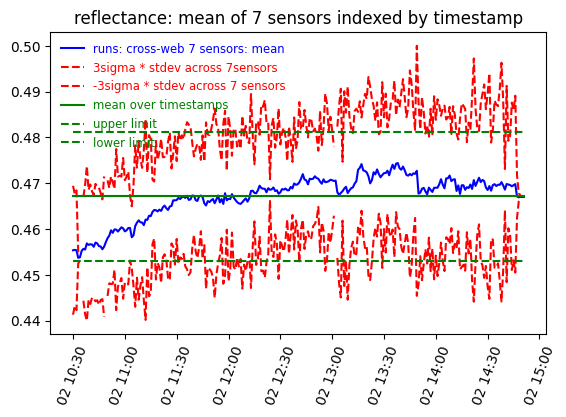

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplots_adjust(bottom=0.25)
#import math
ax = fig.subplots()
x = gra_timestamp.index
a = gra_run_stats.mean()

b = gra_run_stats.std()
y_mean = [a for u in x]
y_uplim = [a + 3*b for u in x]
y_lolim = [a - 3*b for u in x]

y_obs = gra_timestamp['mean_per_timestamp']

y_uppr = (gra_timestamp['covariance'])**.5 + y_obs
y_lwr = -(gra_timestamp['covariance'])**.5 + y_obs
ax.tick_params(axis = 'x', rotation = 70)

ax.plot(x, y_obs, 'b')
ax.plot(x, y_uppr, 'r', linestyle = '--')
ax.plot(x, y_lwr, 'r', linestyle ='--')
ax.plot(x, y_mean, 'g')
ax.plot(x, y_uplim, 'g', linestyle = '--')
ax.plot(x, y_lolim, 'g', linestyle = '--')

ax.tick_params(axis = 'x', rotation = 70)
plt.legend(labels = ['runs: cross-web 7 sensors: mean', ' mean + stdev across 7sensors', ' mean - stdev across 7 sensors'
                     , 'mean over timestamps', 'upper 3 sigma limit', 'lower 3 sigma limit'
                    ]

           ,labelcolor = ['b', 'r', 'r', 'g', 'g', 'g']

           ,loc = 'best', fontsize ='small', frameon = False
           )
plt.title(f'crossweb reflectance: mean of 7 sensors indexed by timestamp')



plt.show()

In [19]:
gra_timestamp.head()


,mean_per_timestamp,covariance
DateTime,,
2024-05-02 10:30:00,0.455351,1.983280e-04
2024-05-02 10:31:00,0.455437,1.507314e-04
2024-05-02 10:32:00,0.455355,1.710933e-04
2024-05-02 10:33:00,0.453699,1.611723e-06
2024-05-02 10:34:00,0.453814,3.991195e-07


Downweb Calculations of sensor data s1, s3, s5, s8, s11, s14, and s16 all grouped by DateTime


In [50]:
a = gra_rawsd_052024[['DateTime', 's1', 's3', 's5', 's8', 's11', 's14', 's16']].groupby(by = 'DateTime').var()
a.rename(columns = {'s1':'vars1','s3':'vars3','s5':'vars5', 's8':'vars8', 's11':'vars11', 's14':'vars14', 's16':'vars16'}, inplace = True)
dw_gra_dev = gra_mean[[ 's1', 's3', 's5', 's8', 's11', 's14', 's16']].join(a, on = 'DateTime', how = 'left')

In [51]:
dw_gra_dev.head()


,s1,s3,s5,s8,s11,s14,s16,vars1,vars3,vars5,vars8,vars11,vars14,vars16
DateTime,,,,,,,,,,,,,,
2024-05-02 10:30:00,0.425324,0.447319,0.447840,0.468580,0.469853,0.469380,0.459163,7.086699e-05,2.272992e-06,1.932854e-06,1.133101e-06,1.048298e-06,1.281153e-06,1.422248e-06
2024-05-02 10:31:00,0.426062,0.446831,0.447137,0.468784,0.469704,0.469623,0.459916,9.670086e-05,2.036431e-06,2.263457e-06,1.788610e-06,1.724160e-06,1.685498e-06,2.026036e-06
2024-05-02 10:32:00,0.424922,0.446745,0.446832,0.468917,0.469688,0.469754,0.460626,7.585580e-05,1.379417e-06,1.641774e-06,9.278868e-07,1.277610e-06,1.513912e-06,1.417345e-06
2024-05-02 10:33:00,0.410045,0.447009,0.447497,0.469547,0.470014,0.470463,0.461321,1.117065e-07,7.880683e-08,7.305501e-08,9.624905e-08,9.848465e-08,1.131715e-07,2.596421e-07
2024-05-02 10:34:00,0.410413,0.447220,0.447541,0.469584,0.470197,0.470249,0.461490,1.475204e-07,1.769547e-08,6.106740e-08,1.134629e-07,1.108212e-07,1.235102e-07,1.159792e-07


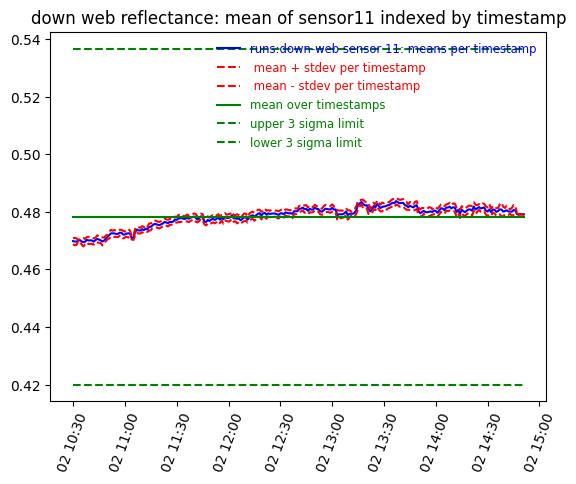

In [54]:
fig, ax = plt.subplots()
x = dw_gra_dev.index
a = dw_gra_dev['s11'].mean(axis = 0)
b = ((dw_gra_dev['vars11']).sum())**.5
y_mean = [a for u in x]
y_uplim = [a+3*b for u in x]
y_lolim = [a-3*b for u in x]
ax.plot(x, dw_gra_dev['s11'], 'b')
ax.plot(x, dw_gra_dev['s11'] + (dw_gra_dev['vars11'])**.5, 'r', linestyle = '--')
ax.plot(x, dw_gra_dev['s11'] - (dw_gra_dev['vars11'])**.5, 'r', linestyle = '--')
ax.plot(x, y_mean, 'g')
ax.plot(x, y_uplim, 'g', linestyle = '--')
ax.plot(x, y_lolim, 'g', linestyle = '--')
ax.tick_params(axis = 'x', rotation = 70)
plt.legend(labels = ['runs:down-web sensor 11: means per timestamp', ' mean + stdev per timestamp', ' mean - stdev per timestamp'
                     , 'mean over timestamps', 'upper 3 sigma limit', 'lower 3 sigma limit'
                    ]

           ,labelcolor = ['b', 'r', 'r', 'g', 'g', 'g']

           ,loc = 'best', fontsize ='small', frameon = False
           )
plt.title(f'down web reflectance: mean of sensor11 indexed by timestamp')



plt.show()

In [28]:
dw_gra_dev[['s1', 's3', 's5', 's8', 's11', 's14', 's16']].mean(axis = 0)

s1     0.447818
s3     0.455434
s5     0.455584
s8     0.479450
s11    0.478355
s14    0.479733
s16    0.473442
dtype: float64